# Illustrate the Fixed Point Iteration Method

In [1]:
using Plots
using Printf

In [2]:
default(lw=2,markersize = 6,
    xtickfont=font(12), ytickfont=font(12), 
    guidefont=font(14), legendfont=font(12),titlefont=font(12))

In [3]:
function fixed_point_iteration(g, p, n_max, rel_tol; verbose=true)
    p_old = p;
    for i in 1:n_max
        p = g(p);
        @printf("%3d: p = %.12f\n", i, p);
        if(i>1)
            if abs(p_old-p)/abs(p) < rel_tol
                break;
            end
        end
        p_old = p;
    end

    return p
    
end

fixed_point_iteration (generic function with 1 method)

## Example
Find a fixed point of 
$$
g(x) = 3^{-x}
$$
in the interval $[0,1]$.

In [4]:
g = x-> 3^(-x);

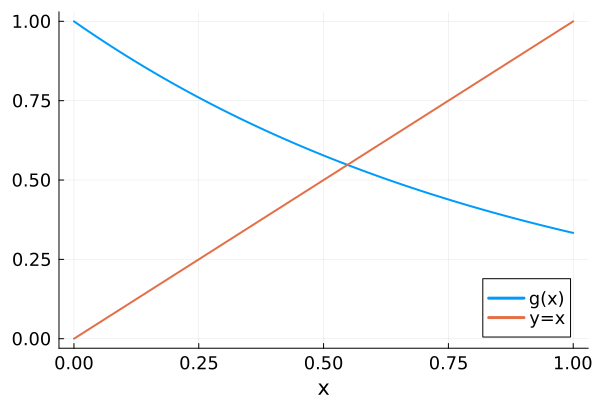

In [5]:
xx = LinRange(0,1,100);
plot(xx, g.(xx), label="g(x)")
plot!(xx,xx,label="y=x")
xlabel!("x")

In [6]:
n_max = 100;
rel_tol = 1e-8;

p0 = 0.5;

p = fixed_point_iteration(g, p0, n_max, rel_tol);

  1: p = 0.577350269190
  2: p = 0.530315004649
  3: p = 0.558438612775
  4: p = 0.541448392137
  5: p = 0.551649798369
  6: p = 0.545501759884
  7: p = 0.549198719371
  8: p = 0.546972658636
  9: p = 0.548311959776
 10: p = 0.547505781772
 11: p = 0.547990909886
 12: p = 0.547698926243
 13: p = 0.547874643543
 14: p = 0.547768889189
 15: p = 0.547832534337
 16: p = 0.547794230490
 17: p = 0.547817282746
 18: p = 0.547803409180
 19: p = 0.547811758683
 20: p = 0.547806733702
 21: p = 0.547809757880
 22: p = 0.547807937840
 23: p = 0.547809033193
 24: p = 0.547808373978
 25: p = 0.547808770713
 26: p = 0.547808531946
 27: p = 0.547808675643
 28: p = 0.547808589162
 29: p = 0.547808641209
 30: p = 0.547808609886
 31: p = 0.547808628737
 32: p = 0.547808617392
 33: p = 0.547808624219
 34: p = 0.547808620110


## Example 
Find a fixed point of 
$$
g(x) = 2\sin(x)
$$
in the interval $[0, \pi]$.

In [7]:
g = x-> 2sin(x);

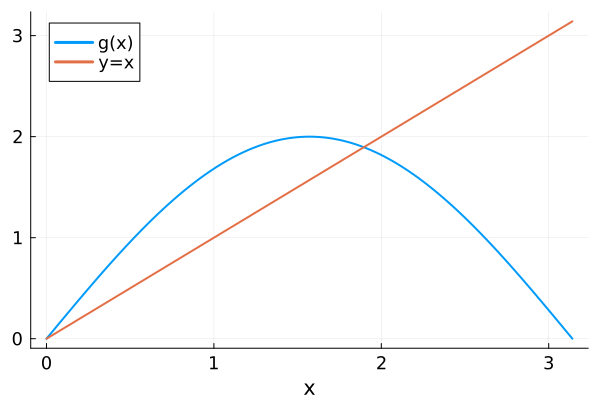

In [8]:
xx = LinRange(0,π,100);
plot(xx, g.(xx), label="g(x)")
plot!(xx,xx,label="y=x")
xlabel!("x")

In [9]:
n_max = 100;
rel_tol = 1e-6;

p0 =2;

p = fixed_point_iteration(g, p0, n_max, rel_tol);

  1: p = 1.818594853651
  2: p = 1.938909453069
  3: p = 1.866016016361
  4: p = 1.913476493442
  5: p = 1.883714959155
  6: p = 1.902878321917
  7: p = 1.890731275211
  8: p = 1.898511758254
  9: p = 1.893560345153
 10: p = 1.896724650920
 11: p = 1.894707792144
 12: p = 1.895995487169
 13: p = 1.895174227927
 14: p = 1.895698369325
 15: p = 1.895364001098
 16: p = 1.895577366487
 17: p = 1.895441239295
 18: p = 1.895528098455
 19: p = 1.895472679978
 20: p = 1.895508040106
 21: p = 1.895485479014
 22: p = 1.895499874114
 23: p = 1.895490689435
 24: p = 1.895496549691
 25: p = 1.895492810591
 26: p = 1.895495196308
 27: p = 1.895493674114


## Example
The following example fails to converge:
$$
g(x) = x - x^3 - 4 x^2 + 10;
$$
Try to find the fixed point in $[1,2]$.

Why does it fail?

In [10]:
g = x-> x - x^3 - 4*x^2 + 10;

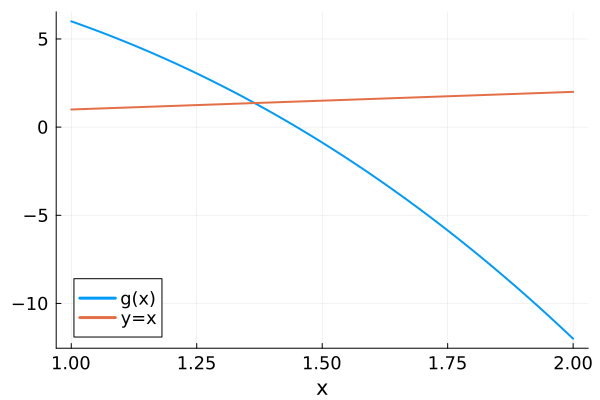

In [11]:
xx = LinRange(1,2,100);
plot(xx, g.(xx), label="g(x)")
plot!(xx,xx,label="y=x")
xlabel!("x")

In [13]:
n_max = 10;
rel_tol = 1e-6;

p0 = 1.26;

p = fixed_point_iteration(g, p0, n_max, rel_tol);

  1: p = 2.909224000000
  2: p = -45.567575648433
  3: p = 86275.510712454794
  4: p = -642218410157005.125000000000
  5: p = 264879442298244324189463085167746911152635904.000000000000
  6: p = -18584238059087181394500005448302781269099100733990226923078146467534427709001788854375640599679427422484684605113215877023151171829760.000000000000
  7: p = Inf
  8: p = NaN
  9: p = NaN
 10: p = NaN


The problem is that $|g'(x)|\gg 1$.